# Explore PM2.5 pattern
## Background on PM2.5 pollutant
## Before diving into PM2.5 pattern, somethings about this pollutant I should point out:

1. It is not really one pollutant but as a collection of suspended particles and aerosols in the air with a diameter of 2.5μm or less. Think PM2.5 as a bag-full items rather one individual substance. PM2.5 is similar to PM10 in this aspect, and different from other gaseous pollutants such as carbon mono-dioxide (CO), nitrous dioxide (NO2), sulfur dioxide (SO2), and ozone (O3).

2. Gaseous pollutants are more directly tied to a process for example:

    CO is attributed by imcompletion burning of carbonacious materials such as biomass, fossil fuels
    NO2 is associated with a high-temperature combustion like in internal engines
    SO2 is originated from burning sulfur, mostly in coals, but in liquid fuels as well. Sour crude oil is named   for a high-content sulfur one. Those high-quality crudes are low sulfur and low-acid content so call sweet crudes.
    
3. So where does the PM2.5 come from?:

    primary via combination and aggregation of carbon element, carbonaous materials, metals, vapor water
    secondary via salts of ammonia, nitrate, sulfate
    if you like cake, then SANDWICH (Sulfate, Sdjusted Nitrate, Derived Water, Inferred Carbon Hybrid) is a short-hand for PM2.5 composition (ref)
    so PM2.5 is a box-full of cookies with variety of chocolate chips, sprinkles, nuts, what have you,

## Because PM2.5 is formed as garbage collector, it is anticipated to be a mix results

emission source:

    - transportation (gasoline engine + diesel engine)
    - domestic cooking (bee-hive stove is a popular option to get heat from a low-quality coal but Hanoi. Hanoi is phasing it out)
    - small boilers and recycle clusters. Surrounded Hanoi from 20-40 km, there are a few dozens of craft villages that mostly recycles metal, plastic, anything else that deems valued. Non-recycles are burned
    - large industrial facilities: such as coal-fired plants, and cement production, some fertile and chemical manufacture
    - ammonia such as from fertile, husbandary, (human) domestic waste
    - secondary gaseous source such as nitrous oxide, sulfur oxide
    - waste incineration (such as street leaves), and biomass burning (seasonally)
    
transport:

    - horizonal transport: wind sweeps out or brings in PM2.5 or its predecessors from/to nearby location
    - vertial transport: temperature difference making air density changed. Hot pockets of air near the surface rise while cold pockets sinked
    - this is considered as dilution
    - with temperature, available water vapor changed leads to change in water composition of PM2.5 and change the size of particles. So we have a train window (or a bin) called PM2.5 that captures (by sensors/ other intruments) to tell what level of PM2.5, and sometimes it tells a lower value of PM2.5 in late afternoons because a portion of particles slided out that window from their shink in size
    - the lower end of size for PM2.5 is 0.1 μm, most low-cost sensors has a smaller end is 0.3 μm (with ~50% of confidence in reading).
    - some reports indicated 0.44 μm is the average diameter, other sensors such as Sensirion SPS30 provides typical particle size (around 0.5-0.6μm). It was not clear this typical size is based on the number of particles or weight of the particles

reaction:

    - photo-chemical reaction could induce more nitrogen dioxide in the summer while a high temperature creates a stronger vertial mixing of air
    - strong radiation is likely to promote oxidation of carbonacious and carbon element
    - wet removal like with heavy rain and saturated humidity are effective to aggregate suspended particles to the size that it can be settled down and precipated with rain

### Essentially, we need to form some questions such as:
1. Is PM2.5 changed with traffic peaks (during the day?)
2. Is PM2.5 changed in weekdays vs. weekends?
3. What did PM2.5 change with month in 2018?

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
mpl.font_manager.fontManager.addfont('tahomo.ttf')
mpl.rc('font', family='tahomo')
%matplotlib inline

In [2]:
data =pd.read_excel(r"D:\Power BI document\bkk_aqi.xlsx",engine='openpyxl',usecols='B:N')

In [3]:
data['timestamp'] = pd.to_datetime(data['timestamp'], utc = True)
data['wind_speed'] = data['wind_speed'].apply(lambda x: x*3.6)
data['day_name'] = data['timestamp'].dt.day_name()
data['time'] = data['timestamp'].dt.time
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year
data.rename(columns = {'wind_speed':'wind_speed_kmph', 'wind_direction':'wind_direction_degree'}, inplace = True)
data.head()

province                 timestamp        pm1      pm2_5       pm10  aqi  \
0  Bangkok 2021-09-07 07:00:00+00:00  14.281552  17.432761  24.862995   29   
1  Bangkok 2021-09-07 08:00:00+00:00  25.498536  26.381210  36.223494   29   
2  Bangkok 2021-09-07 09:00:00+00:00  41.947566  40.212696  52.464677   34   
3  Bangkok 2021-09-07 10:00:00+00:00  56.177618  66.134776  86.635628   48   
4  Bangkok 2021-09-07 11:00:00+00:00  61.647740  71.038060  93.007919   61   

  pollution_level  is_forecast  temperature    humidity       pressure  \
0   คุณภาพอากาศดี        False    52.818773   95.399050  102279.464706   
1   คุณภาพอากาศดี        False    50.156764  107.700030  102228.880747   
2   คุณภาพอากาศดี        False    49.858141  111.525617  102178.681784   
3   คุณภาพอากาศดี        False    49.956425  111.655966  102194.753274   
4         ปานกลาง        False    49.912165  111.925708  102272.628089   

   wind_direction_degree  wind_speed_kmph day_name      time  day  month  year  
0             331.869676         2.420778  Tuesday  07:00:00    7      9  2021  
1             322.883357         0.892810  Tuesday  08:00:00    7      9  2021  
2             326.595928         0.224833  Tuesday  09:00:00    7      9  2021  
3             180.000000         0.000631  Tuesday  10:00:00    7      9  2021  
4             277.143930         0.082977  Tuesday  11:00:00    7      9  2021

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7684 entries, 0 to 7683
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   province               7684 non-null   object             
 1   timestamp              7684 non-null   datetime64[ns, UTC]
 2   pm1                    7684 non-null   float64            
 3   pm2_5                  7684 non-null   float64            
 4   pm10                   7684 non-null   float64            
 5   aqi                    7684 non-null   int64              
 6   pollution_level        7684 non-null   object             
 7   is_forecast            7684 non-null   bool               
 8   temperature            7684 non-null   float64            
 9   humidity               7684 non-null   float64            
 10  pressure               7684 non-null   float64            
 11  wind_direction_degree  7684 non-null   float64          

## Outliers removing

<AxesSubplot:title={'center':'BKK aqi outliers identification from RGARD app data'}>

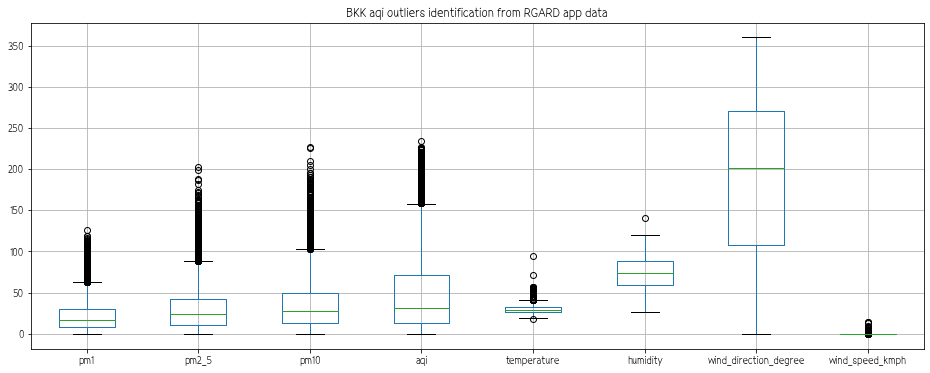

In [22]:
numeric_col1 = ['pm1','pm2_5','pm10','aqi','temperature','humidity','wind_direction_degree','wind_speed_kmph']
plt.figure(figsize=(16,6))
plt.title('BKK aqi outliers identification from RGARD app data')
data.boxplot(numeric_col1)

<AxesSubplot:>

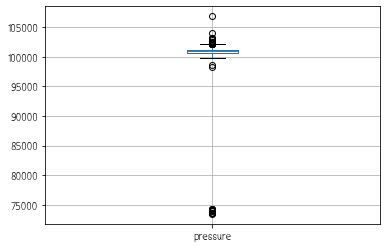

In [23]:
data.boxplot('pressure')

In [42]:
def remove_outliers_std(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        df = df[(df[col] < mean+(n_std*sd)) & (df[col] > mean-(n_std*sd))]
        
    return df
    

In [43]:
col = ['pm1','pm2_5','pm10','aqi','temperature','humidity','wind_direction_degree','wind_speed_kmph','pressure']
new_data = remove_outliers_std(data,col,2)
new_data

Working on column: pm1
Working on column: pm2_5
Working on column: pm10
Working on column: aqi
Working on column: temperature
Working on column: humidity
Working on column: wind_direction_degree
Working on column: wind_speed_kmph
Working on column: pressure


province                 timestamp        pm1      pm2_5       pm10  aqi  \
15    Bangkok 2021-09-10 20:00:00+00:00  28.548342  33.629591  46.768149   26   
21    Bangkok 2021-09-10 21:00:00+00:00  28.528287  33.124284  46.052782   23   
27    Bangkok 2021-09-01 07:00:00+00:00  18.045559  20.695297  38.147126   22   
31    Bangkok 2021-09-10 14:00:00+00:00  13.790755  17.154873  26.156647   27   
39    Bangkok 2021-09-25 16:00:00+00:00  31.694866  37.091803  52.559912   27   
...       ...                       ...        ...        ...        ...  ...   
7679  Bangkok 2022-07-19 00:00:00+00:00   4.643278   7.311507   9.098557    6   
7680  Bangkok 2022-07-24 23:00:00+00:00  10.300291  15.055722  16.964509   11   
7681  Bangkok 2022-07-23 23:00:00+00:00  14.292256  21.754419  24.352357   10   
7682  Bangkok 2022-07-25 22:00:00+00:00  11.353708  16.608050  18.617972   14   
7683  Bangkok 2022-07-25 23:00:00+00:00  15.682807  22.813248  25.421664   14   

       pollution_level  is_forecast  temperature   humidity       pressure  \
15       คุณภาพอากาศดี        False    31.369569  97.114173  100509.353085   
21    คุณภาพอากาศดีมาก        False    31.155423  95.719536  100543.610411   
27    คุณภาพอากาศดีมาก        False    31.235000  70.468333  100429.329167   
31       คุณภาพอากาศดี        False    32.292373  97.616977  100610.663010   
39       คุณภาพอากาศดี        False    29.409128  98.145126  100511.870613   
...                ...          ...          ...        ...            ...   
7679  คุณภาพอากาศดีมาก        False    29.056739  78.140710  100313.466407   
7680  คุณภาพอากาศดีมาก        False    25.071903  98.481884  100452.347954   
7681  คุณภาพอากาศดีมาก        False    26.423268  98.472933  100419.302056   
7682  คุณภาพอากาศดีมาก        False    27.405866  96.529199  100359.400483   
7683  คุณภาพอากาศดีมาก        False    27.653298  96.626409  100441.824389   

      wind_direction_degree  wind_speed_kmph   day_name      time  day  month  \
15               174.865584         0.059376     Friday  20:00:00   10      9   
21                96.577430         0.169451     Friday  21:00:00   10      9   
27               270.000000         0.000000  Wednesday  07:00:00    1      9   
31               181.015502         0.103767     Friday  14:00:00   10      9   
39               302.361736         0.338310   Saturday  16:00:00   25      9   
...                     ...              ...        ...       ...  ...    ...   
7679             206.346649         0.120914    Tuesday  00:00:00   19      7   
7680              59.915495         0.000565     Sunday  23:00:00   24      7   
7681             153.617502         0.018775   Saturday  23:00:00   23      7   
7682             292.500000         0.001811     Monday  22:00:00   25      7   
7683              45.000000         0.001061     Monday  23:00:00   25      7   

      year  
15    2021  
21    2021  
27    2021  
31    2021  
39    2021  
...    ...  
7679  2022  
7680  2022  
7681  2022  
7682  2022  
7683  2022  

[5500 rows x 18 columns]

<AxesSubplot:title={'center':'BKK aqi outliers identification from RGARD app data'}>

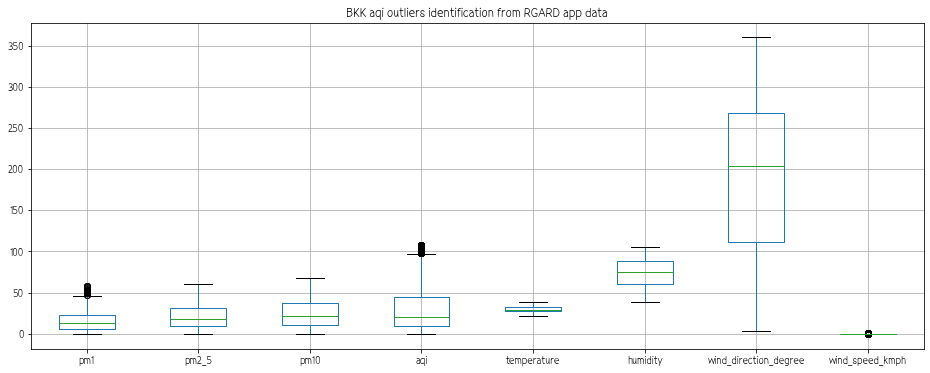

In [44]:
plt.figure(figsize=(16,6))
plt.title('BKK aqi outliers identification from RGARD app data')
new_data.boxplot(numeric_col1)

In [30]:
def remove_outliers_IQR(df,columns):
    for col in columns:
        print('Working on column: {}'.format(col))
        Q1= df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        df = df[(df[col] < upper_limit) & (df[col] > lower_limit)]
    
    return df
        
        

In [32]:
new_data2 = remove_outliers_IQR(data,col)
new_data2

Working on column: pm1
Working on column: pm2_5
Working on column: pm10
Working on column: aqi
Working on column: temperature
Working on column: humidity
Working on column: wind_direction_degree
Working on column: wind_speed_kmph
Working on column: pressure


province                 timestamp        pm1      pm2_5       pm10  aqi  \
15    Bangkok 2021-09-10 20:00:00+00:00  28.548342  33.629591  46.768149   26   
21    Bangkok 2021-09-10 21:00:00+00:00  28.528287  33.124284  46.052782   23   
27    Bangkok 2021-09-01 07:00:00+00:00  18.045559  20.695297  38.147126   22   
31    Bangkok 2021-09-10 14:00:00+00:00  13.790755  17.154873  26.156647   27   
44    Bangkok 2021-09-08 22:00:00+00:00  50.646998  55.880342  75.853119   62   
...       ...                       ...        ...        ...        ...  ...   
7679  Bangkok 2022-07-19 00:00:00+00:00   4.643278   7.311507   9.098557    6   
7680  Bangkok 2022-07-24 23:00:00+00:00  10.300291  15.055722  16.964509   11   
7681  Bangkok 2022-07-23 23:00:00+00:00  14.292256  21.754419  24.352357   10   
7682  Bangkok 2022-07-25 22:00:00+00:00  11.353708  16.608050  18.617972   14   
7683  Bangkok 2022-07-25 23:00:00+00:00  15.682807  22.813248  25.421664   14   

       pollution_level  is_forecast  temperature    humidity       pressure  \
15       คุณภาพอากาศดี        False    31.369569   97.114173  100509.353085   
21    คุณภาพอากาศดีมาก        False    31.155423   95.719536  100543.610411   
27    คุณภาพอากาศดีมาก        False    31.235000   70.468333  100429.329167   
31       คุณภาพอากาศดี        False    32.292373   97.616977  100610.663010   
44             ปานกลาง        False    35.027189  101.476648  100882.818113   
...                ...          ...          ...         ...            ...   
7679  คุณภาพอากาศดีมาก        False    29.056739   78.140710  100313.466407   
7680  คุณภาพอากาศดีมาก        False    25.071903   98.481884  100452.347954   
7681  คุณภาพอากาศดีมาก        False    26.423268   98.472933  100419.302056   
7682  คุณภาพอากาศดีมาก        False    27.405866   96.529199  100359.400483   
7683  คุณภาพอากาศดีมาก        False    27.653298   96.626409  100441.824389   

      wind_direction_degree  wind_speed_kmph   day_name      time  day  month  \
15               174.865584         0.059376     Friday  20:00:00   10      9   
21                96.577430         0.169451     Friday  21:00:00   10      9   
27               270.000000         0.000000  Wednesday  07:00:00    1      9   
31               181.015502         0.103767     Friday  14:00:00   10      9   
44               315.000000         0.014300  Wednesday  22:00:00    8      9   
...                     ...              ...        ...       ...  ...    ...   
7679             206.346649         0.120914    Tuesday  00:00:00   19      7   
7680              59.915495         0.000565     Sunday  23:00:00   24      7   
7681             153.617502         0.018775   Saturday  23:00:00   23      7   
7682             292.500000         0.001811     Monday  22:00:00   25      7   
7683              45.000000         0.001061     Monday  23:00:00   25      7   

      year  
15    2021  
21    2021  
27    2021  
31    2021  
44    2021  
...    ...  
7679  2022  
7680  2022  
7681  2022  
7682  2022  
7683  2022  

[6100 rows x 18 columns]

<AxesSubplot:title={'center':'BKK aqi outliers identification from RGARD app data'}>

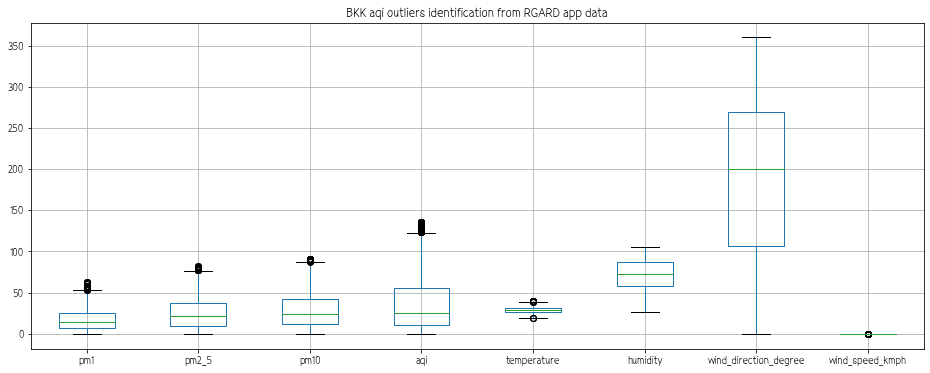

In [33]:
plt.figure(figsize=(16,6))
plt.title('BKK aqi outliers identification from RGARD app data')
new_data2.boxplot(numeric_col1)

## Corelation

C:\Users\NapatCota\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'Correlations heatmap')

C:\Users\NapatCota\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


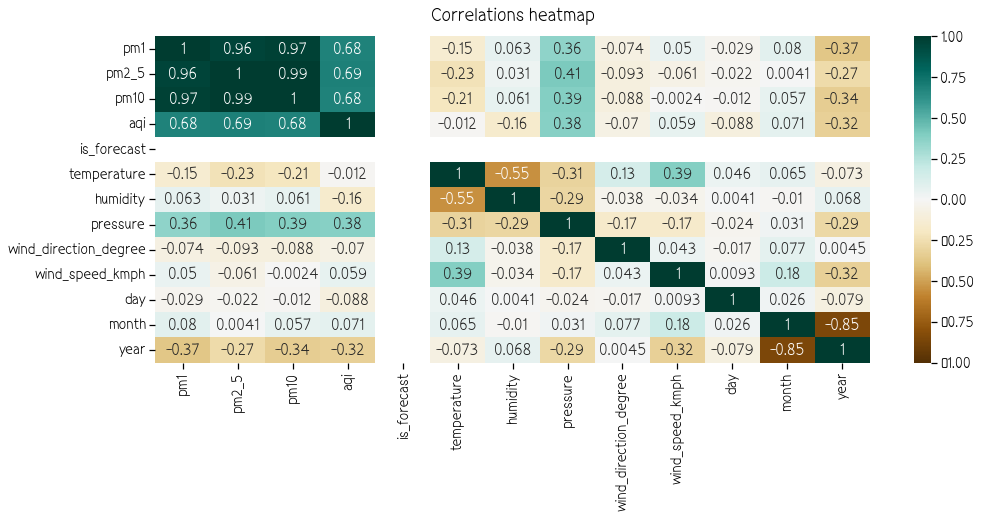

In [74]:
corr = new_data.corr()
plt.figure(figsize=(16,6))
heat_map = sns.heatmap(corr, vmin= -1, vmax= 1,annot=True,cmap='BrBG')
heat_map.set_title('Correlations heatmap', fontdict = {'fontsize': 18},pad = 16)

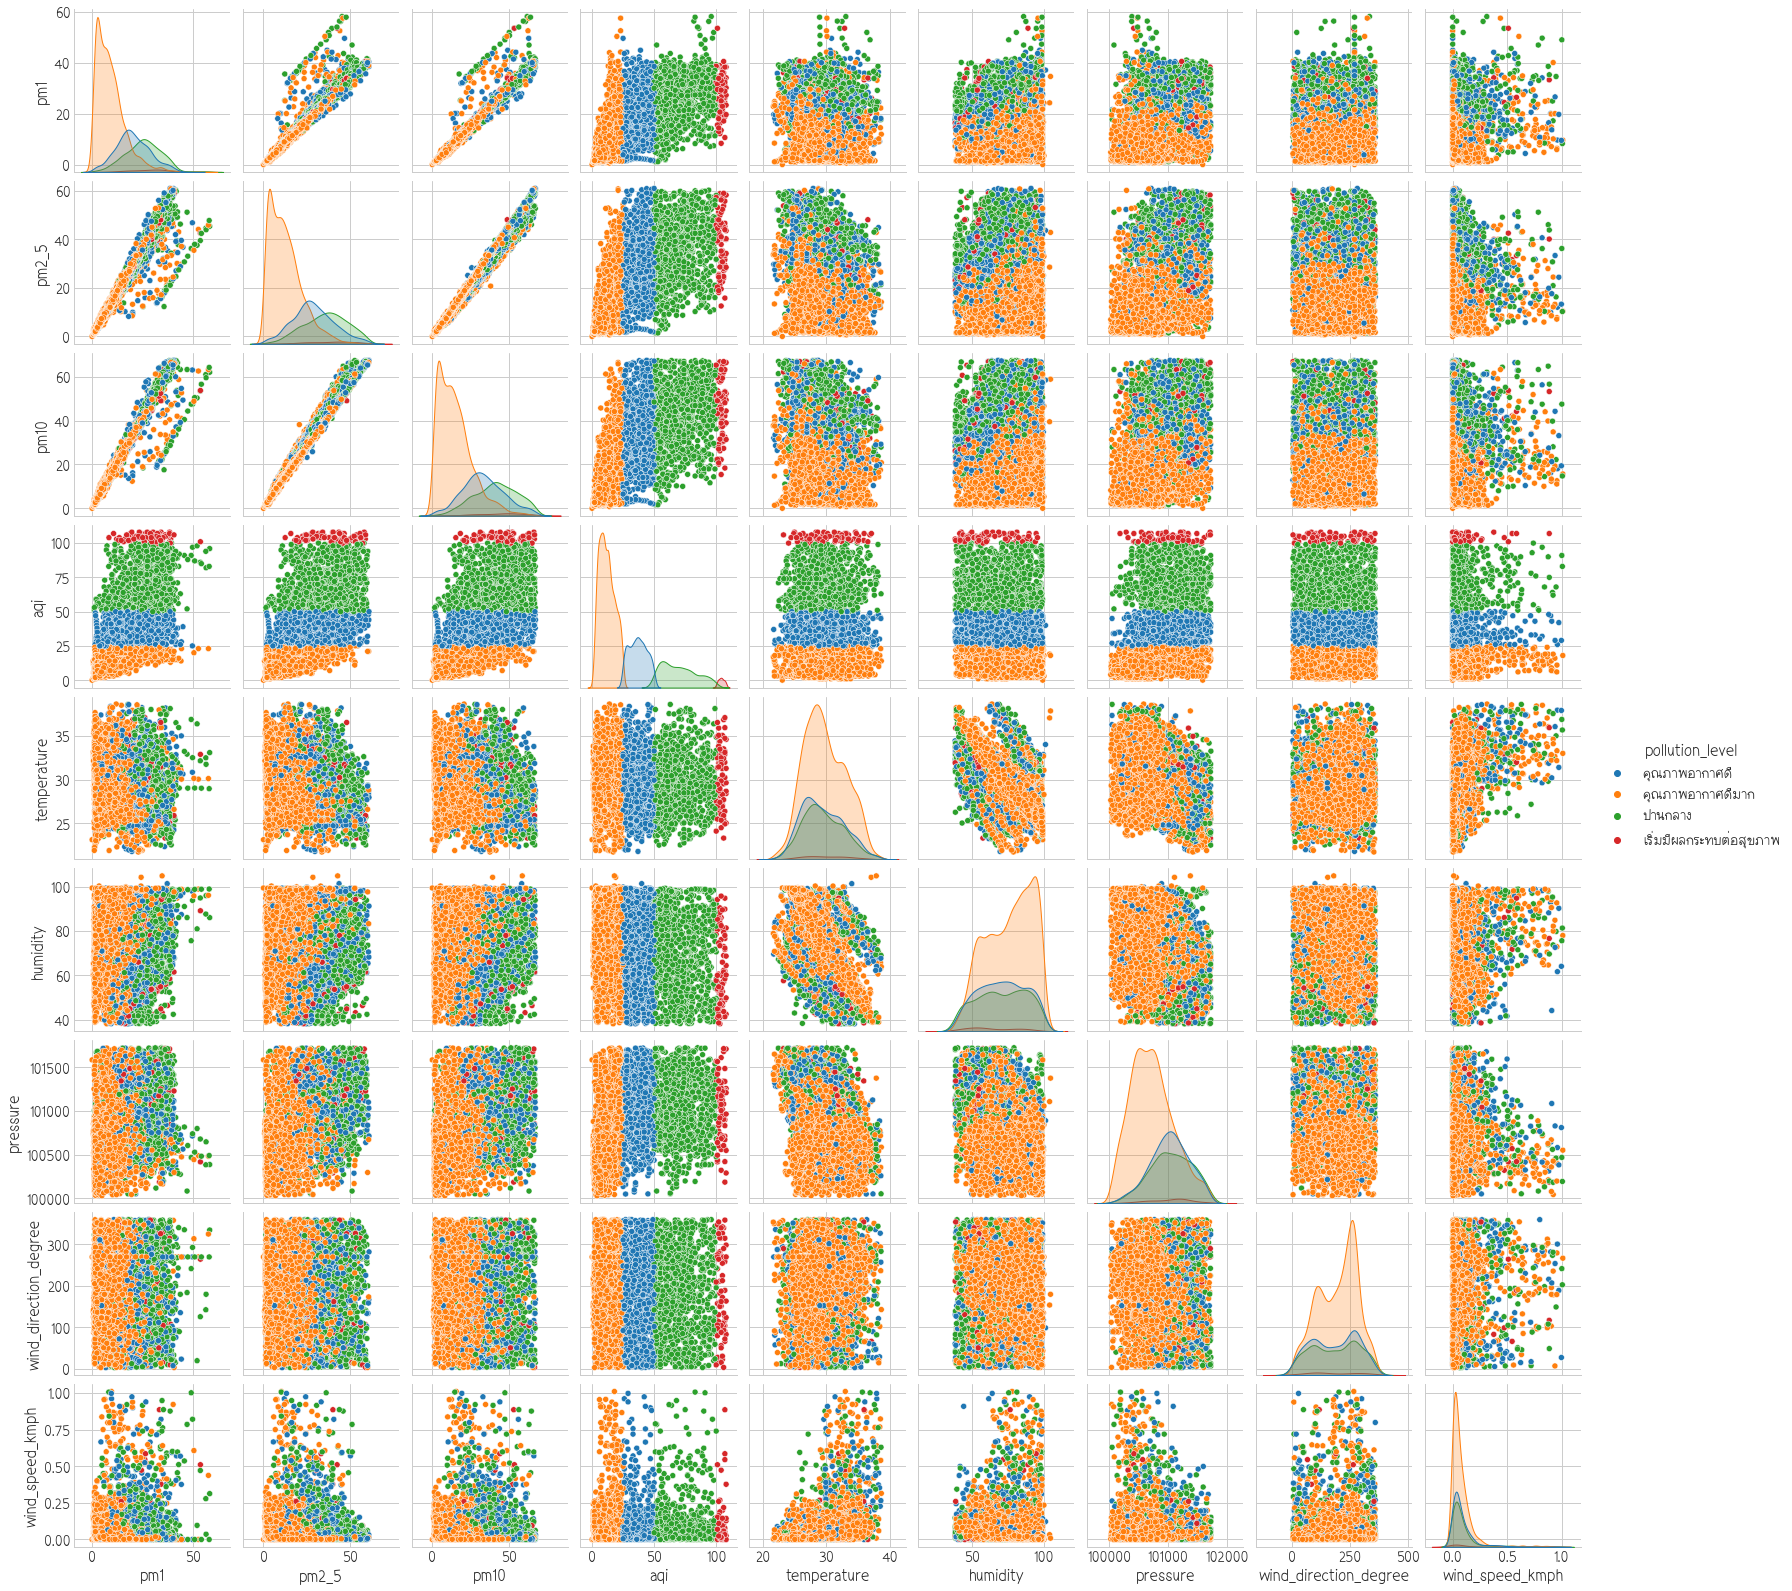

In [230]:
data = new_data.reset_index
data = new_data[['pm1','pm2_5','pm10','aqi','pollution_level','temperature','humidity','pressure','wind_direction_degree','wind_speed_kmph']]
sns.pairplot(data,hue = 'pollution_level')

## visualization with matplotlib and seaborn

In [45]:
new_data.set_index('timestamp', inplace=True)


array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

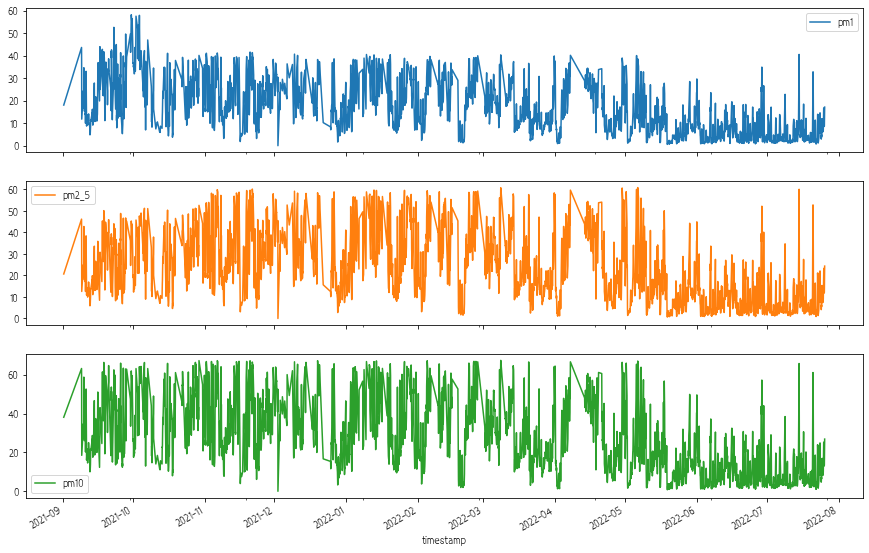

In [46]:
new_data[['pm1','pm2_5','pm10']].plot(subplots=True, figsize=(15,10))

In [79]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5500 entries, 2021-09-10 20:00:00+00:00 to 2022-07-25 23:00:00+00:00
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   province               5500 non-null   object 
 1   pm1                    5500 non-null   float64
 2   pm2_5                  5500 non-null   float64
 3   pm10                   5500 non-null   float64
 4   aqi                    5500 non-null   int64  
 5   pollution_level        5500 non-null   object 
 6   is_forecast            5500 non-null   bool   
 7   temperature            5500 non-null   float64
 8   humidity               5500 non-null   float64
 9   pressure               5500 non-null   float64
 10  wind_direction_degree  5500 non-null   float64
 11  wind_speed_kmph        5500 non-null   float64
 12  day_name               5500 non-null   object 
 13  time                   5500 non-null   object 
 14  day     

<AxesSubplot:xlabel='timestamp'>

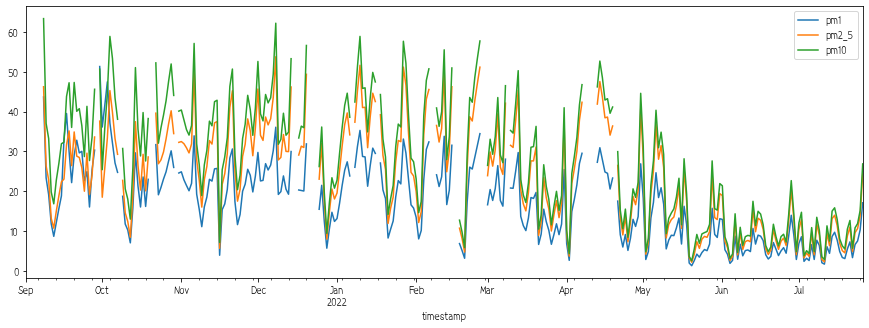

In [48]:
new_data[['pm1','pm2_5','pm10']].resample('1D').mean().plot(figsize=(15,5), kind='line')

<AxesSubplot:title={'center':'pollution Tags (Name)'}, ylabel='pm2_5'>

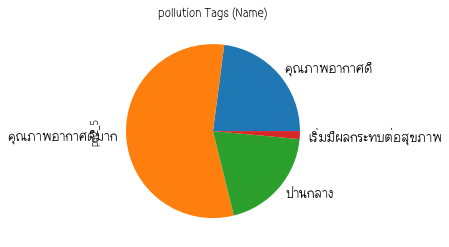

In [55]:
new_data.groupby('pollution_level')['pm2_5'].count().plot.pie(title='pollution Tags (Name)', fontsize=14)

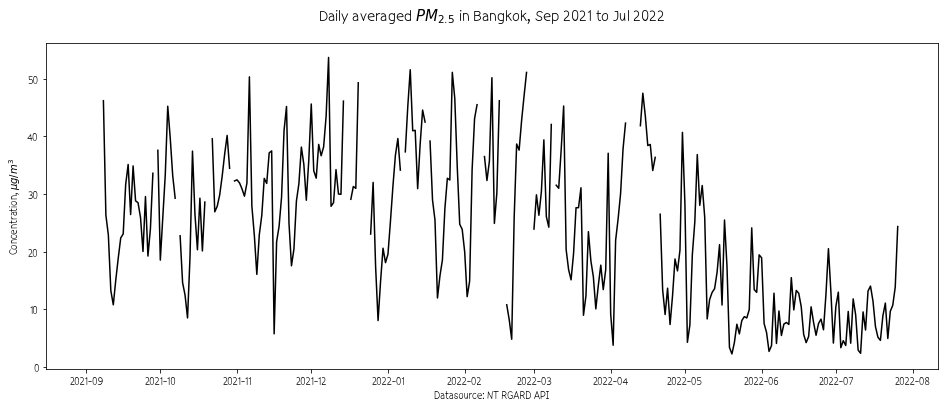

In [59]:
plt.figure(figsize=(16,6))
plt.title('Daily averaged $PM_{2.5}$ in Bangkok, Sep 2021 to Jul 2022', fontsize=15, y=1.05)
plt.ylabel('Concentration, $\mu g/m^3$')
plt.xlabel('Datasource: NT RGARD API', fontsize=10)
dft = new_data[['pm2_5']].resample('1D').mean()
# change the line color, thickness
plt.plot(dft, color='black', linewidth=1.5)

In [68]:
colors = ['red', 'yellow', 'blue', 'green']
orders = ['เริ่มมีผลกระทบต่อสุขภาพ', 'ปานกลาง', 'คุณภาพอากาศดี', 'คุณภาพอากาศดีมาก']
colormap = dict(zip(orders, colors))
colormap

{'เริ่มมีผลกระทบต่อสุขภาพ': 'red',
 'ปานกลาง': 'yellow',
 'คุณภาพอากาศดี': 'blue',
 'คุณภาพอากาศดีมาก': 'green'}

In [69]:
new_data['pollution_level'].value_counts()

คุณภาพอากาศดีมาก           3076
คุณภาพอากาศดี              1261
ปานกลาง                    1082
เริ่มมีผลกระทบต่อสุขภาพ      81
Name: pollution_level, dtype: int64

<AxesSubplot:xlabel='timestamp', ylabel='pm2_5'>

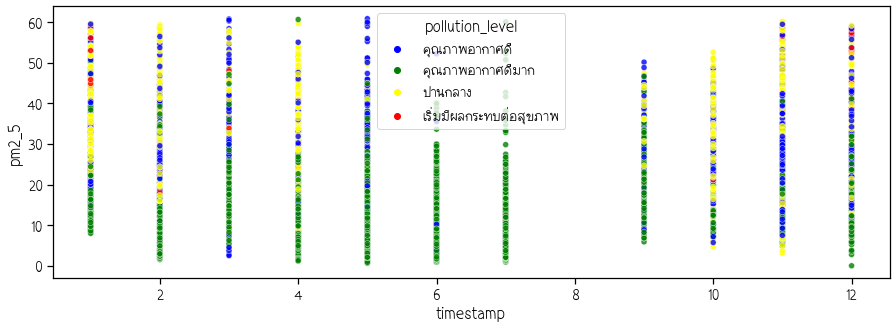

In [70]:
sns.scatterplot(data=new_data, x=new_data.index.month, y=new_data['pm2_5'],
                hue='pollution_level', palette=colormap, alpha=0.8)

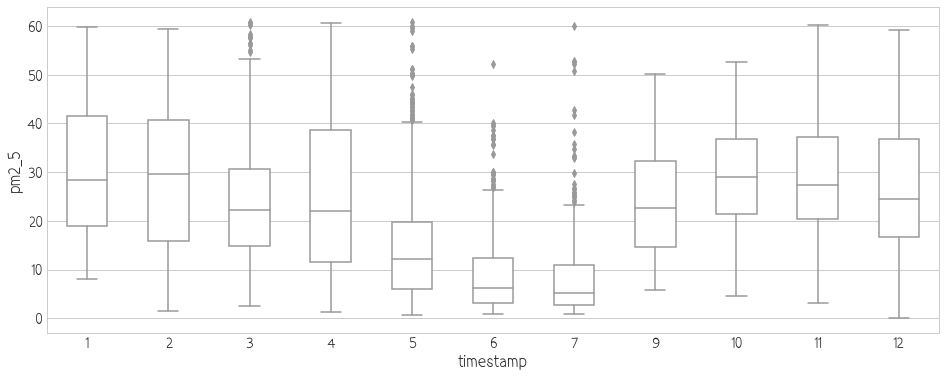

In [175]:
# if we want to have statistics look, the boxplot is a good place start
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=new_data, x=new_data.index.month, y=new_data['pm2_5'], width=0.5, palette=['white'])
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')

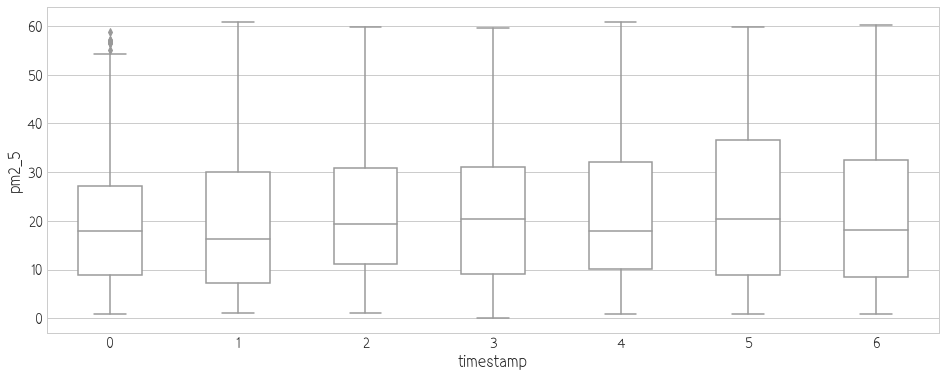

In [179]:
# if we want to have statistics look, the boxplot is a good place start
plt.figure(figsize=(16,6))
ax1 = sns.boxplot(data=new_data, x=new_data.index.dayofweek, y=new_data['pm2_5'], width=0.5, palette=['white'])
for i,box in enumerate(ax1.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax1.lines[j].set_color('black')

<AxesSubplot:xlabel='time'>

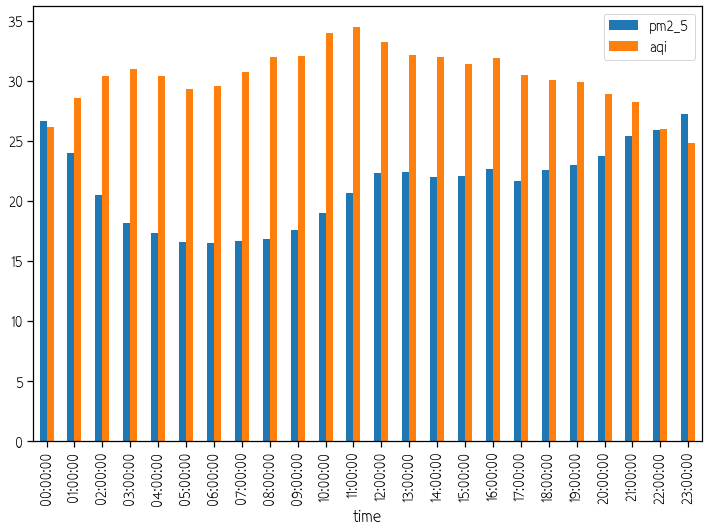

In [82]:
group_d = new_data.groupby('time').agg({ 'pm2_5': 'mean','aqi':'mean'})

group_d.plot.bar(figsize=(12,8))

<AxesSubplot:xlabel='day_name'>

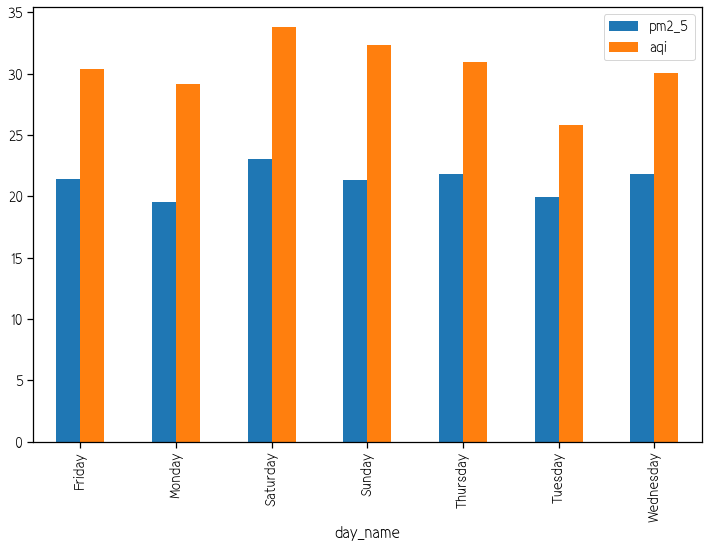

In [84]:
group = new_data.groupby('day_name').agg({'pm2_5': 'mean','aqi':'mean'})
group = group.sort_values(by="day_name")
group.plot.bar(figsize=(12,8))

C:\Users\NapatCota\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pm2_5', ylabel='Density'>

C:\Users\NapatCota\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


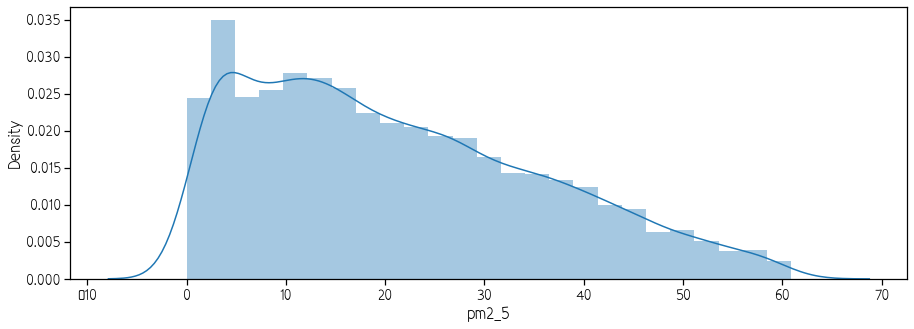

In [85]:
sns.distplot(new_data['pm2_5'])

In [86]:
dft2 = new_data[['pm2_5']].resample('1D')

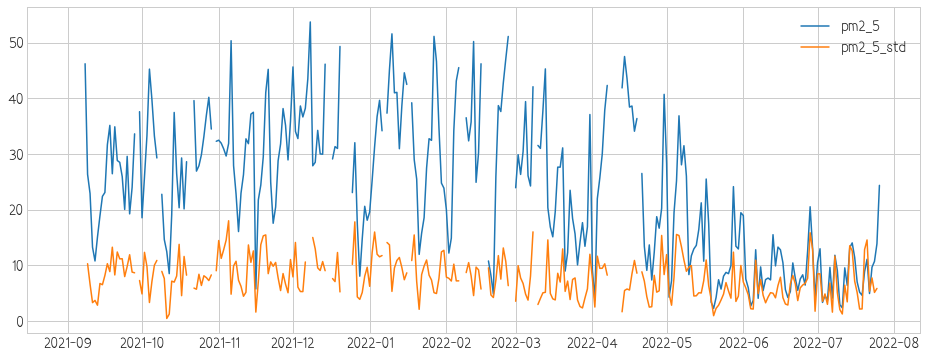

In [173]:
plt.figure(figsize=(16,6))
plt.plot(dft)
plt.plot(dft2.std())
plt.legend(['pm2_5', 'pm2_5_std'], loc ="upper right")
plt.show()

In [88]:
std = dft2.std()
std.head()

pm2_5
timestamp                       
2021-09-01 00:00:00+00:00    NaN
2021-09-02 00:00:00+00:00    NaN
2021-09-03 00:00:00+00:00    NaN
2021-09-04 00:00:00+00:00    NaN
2021-09-05 00:00:00+00:00    NaN

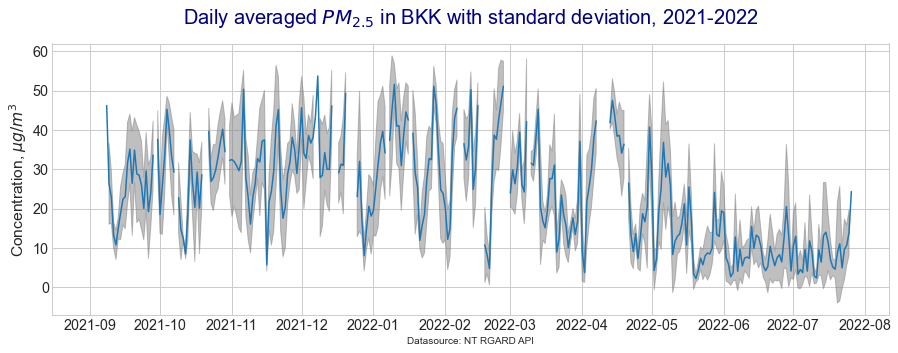

In [91]:
plt.style.use('seaborn-whitegrid')
plt.fill_between(std.index, 
                 dft[dft.columns[0]] - std[std.columns[0]],
                 dft[dft.columns[0]] + std[std.columns[0]], 
                 color='gray',
                 alpha=0.5)
plt.plot(dft.index, dft.values)
plt.xlabel('Datasource: NT RGARD API', fontsize=10)
plt.title('Daily averaged $PM_{2.5}$ in BKK with standard deviation, 2021-2022', 
          color='navy',
          fontsize=20, y=1.05)
plt.ylabel('Concentration, $\mu g/m^3$');

## Is PM2.5 changed with traffic peaks (during the day)?


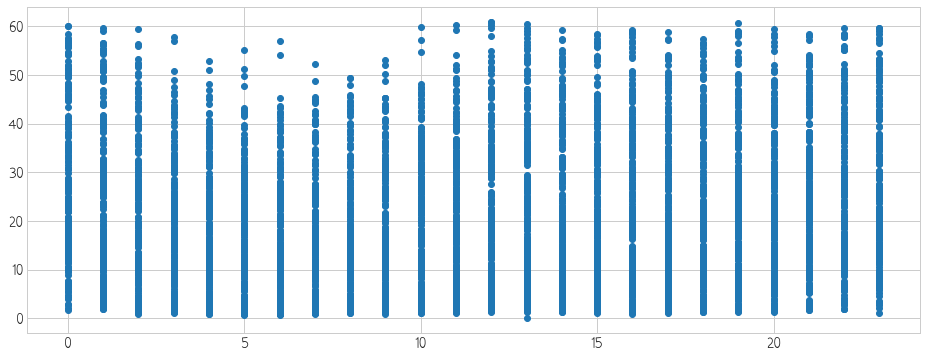

In [151]:
plt.figure(figsize=(16,6))
plt.scatter(new_data.index.hour, new_data['pm2_5'])

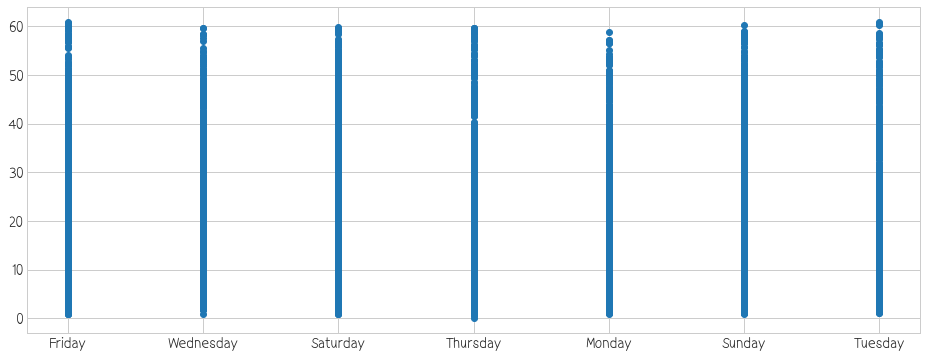

In [147]:
plt.figure(figsize=(16,6))
plt.scatter(new_data.day_name, new_data['pm2_5'])

In [153]:
! pip install windrose --upgrade

In [154]:
from windrose import WindroseAxes
import matplotlib.cm as cm


In [157]:
ws = np.array(new_data['wind_speed_kmph'])
wd = np.array(new_data['wind_direction_degree'])

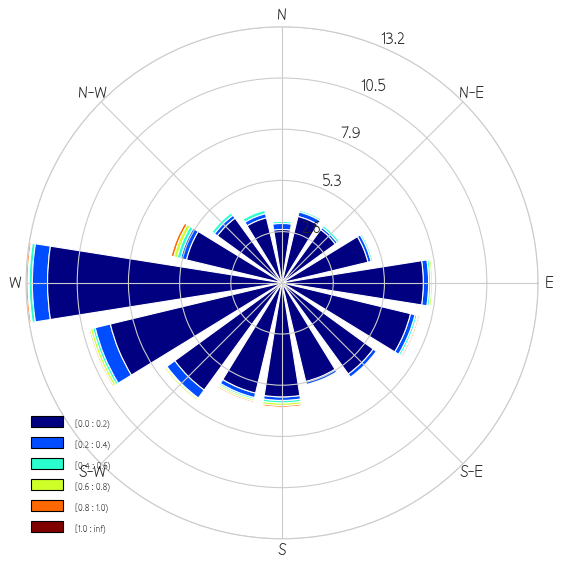

In [158]:
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

<AxesSubplot:xlabel='wind_direction_degree', ylabel='wind_speed_kmph'>

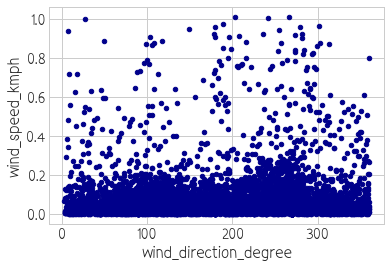

In [211]:
new_data.plot.scatter(x='wind_direction_degree',y='wind_speed_kmph',c='DarkBlue')

C:\Users\NapatCota\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wind_direction_degree', ylabel='Density'>

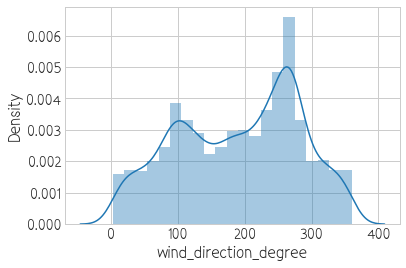

In [221]:
sns.distplot(new_data['wind_direction_degree'])


C:\Users\NapatCota\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wind_speed_kmph', ylabel='Density'>

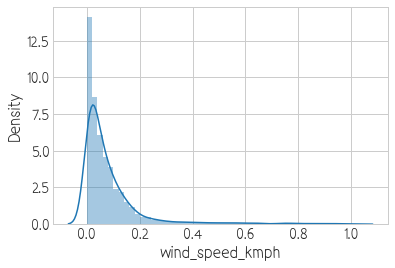

In [222]:
sns.distplot(new_data['wind_speed_kmph'])

## Relative Humidity

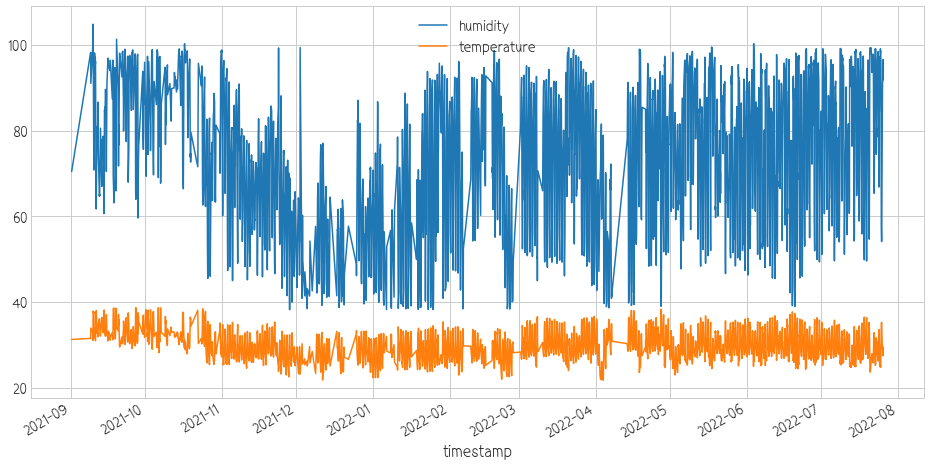

In [223]:
new_data['humidity'].plot( figsize=(16,8))
new_data['temperature'].plot( figsize=(16,8))
plt.legend()
plt.show()